<a href="https://colab.research.google.com/github/yassine-cherni/Self-Driving-Car-Focus-/blob/main/YOLOV8_TRAFFIC_SIGN_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 10.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

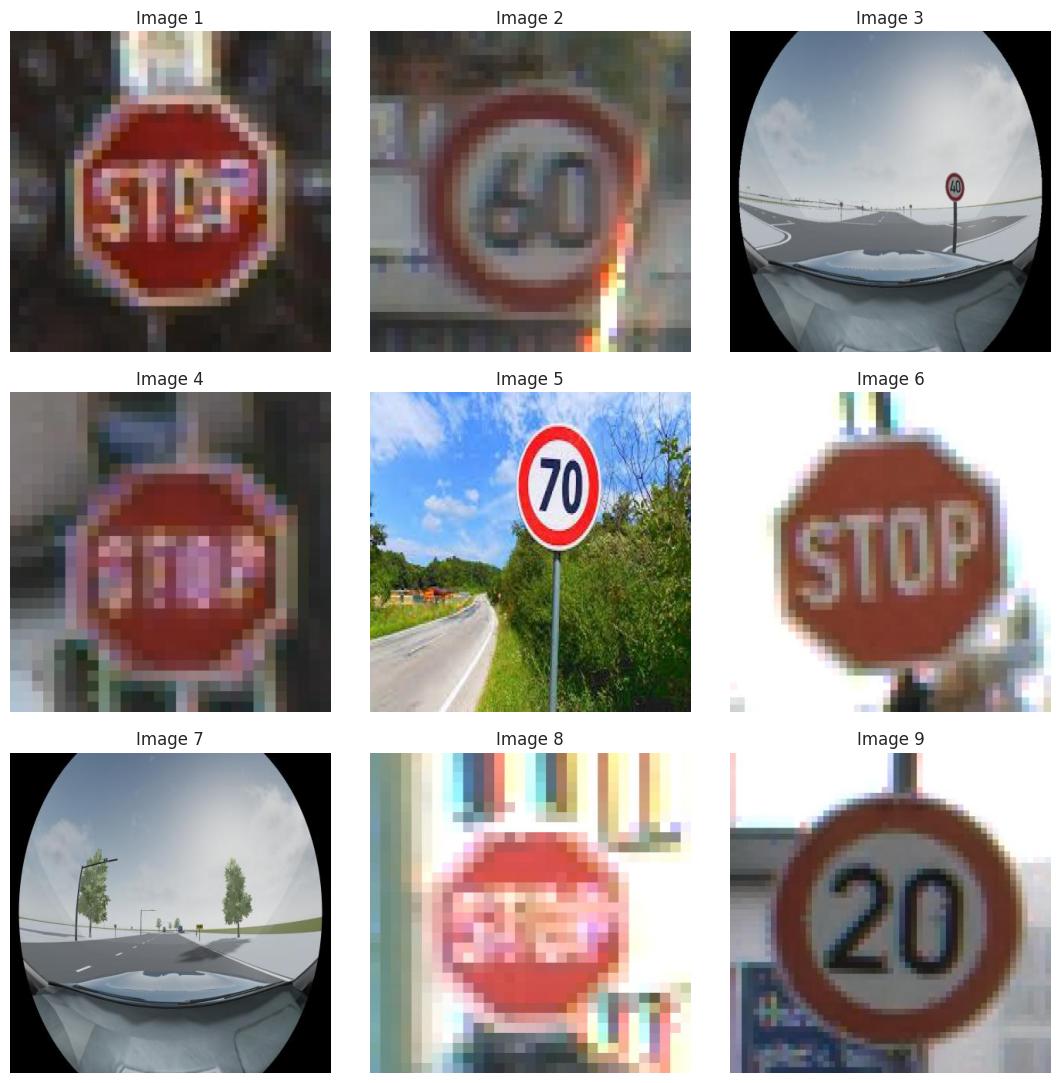

In [3]:
Image_dir = '/content/drive/MyDrive/Traffic/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Get the size of the image
image = cv2.imread("/content/drive/MyDrive/Traffic/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 131MB/s]



image 1/1 /content/drive/MyDrive/Traffic/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 9.0ms
Speed: 5.3ms preprocess, 9.0ms inference, 3132.6ms postprocess per image at shape (1, 3, 416, 416)


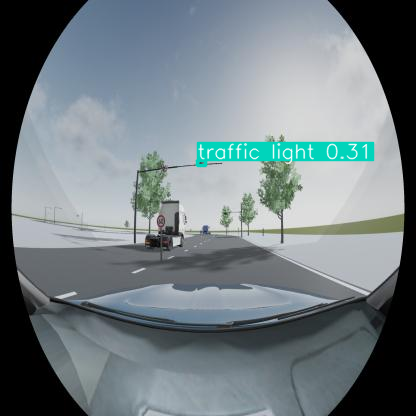

In [5]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/drive/MyDrive/Traffic/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/Traffic/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Traffic/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/Traffic/train/labels.cache... 3530 images, 13 backgrounds, 0 corrupt: 100%|██████████| 3540/3540 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Traffic/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.85G     0.8471      3.486      1.102         45        416: 100%|██████████| 56/56 [11:24<00:00, 12.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.35s/it]

                   all        801        944     0.0563       0.78      0.156      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.79G     0.7268       2.33      1.019         44        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]

                   all        801        944      0.198       0.51      0.263      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.82G     0.7302      1.994      1.009         43        416: 100%|██████████| 56/56 [00:49<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

                   all        801        944      0.358       0.48      0.405      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.82G        0.7      1.732     0.9914         49        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

                   all        801        944      0.533      0.478      0.465      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.81G     0.6887      1.489     0.9867         54        416: 100%|██████████| 56/56 [00:50<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]

                   all        801        944      0.662      0.621      0.648      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       3.8G     0.6685      1.365     0.9746         45        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.14s/it]

                   all        801        944      0.636      0.625      0.668      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.79G     0.6501      1.237     0.9668         46        416: 100%|██████████| 56/56 [00:46<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]

                   all        801        944      0.817      0.668      0.778      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.81G     0.6469       1.14     0.9656         41        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]

                   all        801        944      0.805      0.682       0.77      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.82G     0.6321      1.077     0.9544         47        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944      0.821      0.722      0.812      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.82G     0.6162      1.012     0.9561         35        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]

                   all        801        944      0.865      0.725       0.81      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.82G     0.6206      0.976     0.9516         40        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944      0.874      0.756      0.835      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.79G     0.6074     0.9147     0.9472         34        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

                   all        801        944      0.894      0.739      0.839      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.81G     0.6102     0.8931     0.9483         30        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]

                   all        801        944      0.904      0.744      0.834      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.82G     0.6025     0.8859     0.9438         41        416: 100%|██████████| 56/56 [00:51<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        801        944      0.895      0.753      0.848      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.82G     0.6123     0.8538     0.9449         49        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

                   all        801        944        0.9      0.775      0.861      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.82G      0.592     0.8347     0.9395         41        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        801        944       0.86      0.775       0.85      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.83G     0.5843     0.8088     0.9355         36        416: 100%|██████████| 56/56 [00:54<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

                   all        801        944      0.864      0.792      0.863      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.83G     0.5832     0.8011     0.9393         50        416: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.24s/it]

                   all        801        944       0.88      0.789      0.867      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.82G     0.5775     0.7601      0.935         38        416: 100%|██████████| 56/56 [00:48<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        801        944      0.906      0.809      0.883      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.83G     0.5805     0.7645     0.9379         37        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        801        944      0.909      0.816      0.885      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.79G     0.5785     0.7304     0.9332         43        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        801        944      0.942      0.803      0.884      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.82G     0.5641     0.7346     0.9316         43        416: 100%|██████████| 56/56 [00:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]

                   all        801        944      0.932      0.812       0.89      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.82G     0.5749     0.7346     0.9354         39        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]

                   all        801        944      0.945      0.789      0.878      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.82G     0.5615     0.7139     0.9324         38        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]


                   all        801        944      0.926      0.818      0.894       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.81G     0.5666     0.7102     0.9314         42        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]

                   all        801        944      0.952      0.813      0.891      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.82G      0.573     0.7023      0.933         45        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.23s/it]

                   all        801        944      0.943      0.816      0.898      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.82G     0.5618     0.6823     0.9266         35        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


                   all        801        944      0.945      0.805      0.898      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.79G     0.5591     0.6876     0.9321         43        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        801        944      0.902      0.821       0.89      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.81G     0.5552     0.6662     0.9241         45        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        801        944      0.901      0.833      0.897      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       3.8G     0.5618     0.6681     0.9256         51        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        801        944      0.902      0.839      0.898      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.82G      0.547      0.651     0.9258         31        416: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.00it/s]

                   all        801        944      0.906      0.828      0.896      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.8G     0.5513     0.6458     0.9203         49        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.24s/it]

                   all        801        944      0.923      0.829      0.902      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.82G     0.5467     0.6286     0.9211         42        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]


                   all        801        944      0.944      0.828      0.904       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.79G     0.5447     0.6249     0.9247         38        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]


                   all        801        944      0.952      0.821      0.901      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.79G     0.5377     0.6281     0.9237         50        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]

                   all        801        944      0.956       0.83      0.909      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.82G     0.5541      0.633     0.9216         37        416: 100%|██████████| 56/56 [00:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]

                   all        801        944      0.946      0.833      0.909      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.79G     0.5287     0.6157     0.9206         38        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        801        944      0.935      0.826      0.906      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.82G       0.54     0.6137     0.9205         40        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        801        944       0.93      0.837       0.91      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.79G     0.5416     0.6021     0.9241         39        416: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        801        944      0.912      0.851      0.911       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.81G     0.5306     0.5883     0.9191         38        416: 100%|██████████| 56/56 [00:49<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        801        944      0.933      0.848      0.914      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.81G     0.5418     0.5903     0.9225         50        416: 100%|██████████| 56/56 [00:48<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        801        944      0.924      0.853      0.914      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       3.8G     0.5311     0.5861     0.9191         47        416: 100%|██████████| 56/56 [00:48<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        801        944      0.907      0.863      0.917      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.82G     0.5263     0.5948     0.9162         42        416: 100%|██████████| 56/56 [00:46<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        801        944      0.938       0.85       0.92      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.79G     0.5246     0.5838     0.9157         46        416: 100%|██████████| 56/56 [00:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


                   all        801        944      0.926      0.862      0.916      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.82G     0.5346     0.5855     0.9159         42        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        801        944      0.929      0.856      0.917      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.79G     0.5172     0.5755     0.9148         53        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        801        944      0.951      0.858      0.923      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.82G     0.5223     0.5579     0.9176         41        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        801        944      0.941      0.838      0.918      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.81G     0.5162     0.5688     0.9146         40        416: 100%|██████████| 56/56 [00:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944       0.94      0.864      0.919      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.81G      0.506     0.5443      0.913         49        416: 100%|██████████| 56/56 [00:45<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]

                   all        801        944      0.932      0.878      0.925      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.81G     0.5129     0.5438     0.9124         39        416: 100%|██████████| 56/56 [00:45<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]

                   all        801        944      0.946      0.855      0.926      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.82G     0.5189     0.5578     0.9113         39        416: 100%|██████████| 56/56 [00:46<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]

                   all        801        944      0.946      0.855      0.924      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.79G     0.5174     0.5308     0.9114         38        416: 100%|██████████| 56/56 [00:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944      0.922      0.862       0.92      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.82G     0.5126     0.5364      0.914         33        416: 100%|██████████| 56/56 [00:46<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

                   all        801        944      0.941      0.862      0.926      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.82G      0.518     0.5365     0.9149         40        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]

                   all        801        944      0.932      0.849      0.922      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.79G     0.5056     0.5326     0.9116         31        416: 100%|██████████| 56/56 [00:46<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

                   all        801        944      0.936      0.865      0.926      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.82G     0.5064      0.537     0.9108         41        416: 100%|██████████| 56/56 [00:48<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]

                   all        801        944       0.93      0.886      0.929      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.79G     0.5072     0.5322     0.9148         42        416: 100%|██████████| 56/56 [00:46<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

                   all        801        944      0.941      0.868      0.928       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.81G     0.5037     0.5292     0.9081         43        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        801        944      0.947      0.862      0.931       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.82G     0.5031     0.5149     0.9059         42        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]

                   all        801        944      0.925      0.863      0.923      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.82G     0.4947     0.5096     0.9059         34        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        801        944      0.916      0.876      0.923      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.82G     0.4919     0.4916     0.9041         42        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        801        944      0.924      0.868      0.922      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.81G     0.4952     0.4938     0.9051         43        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        801        944      0.933      0.878       0.93      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.82G     0.4977     0.4922     0.9085         54        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


                   all        801        944      0.947      0.873      0.931      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.82G     0.4958     0.4977     0.9068         44        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]

                   all        801        944      0.926      0.885      0.934       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.79G     0.4828     0.4833     0.9048         37        416: 100%|██████████| 56/56 [00:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        801        944      0.935      0.881      0.931      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.82G     0.4931     0.4947     0.9074         46        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        801        944      0.961      0.879       0.94      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.81G     0.4872     0.4975     0.9067         42        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        801        944      0.935      0.885      0.932      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.79G     0.4924     0.4852      0.906         42        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.20s/it]

                   all        801        944      0.929      0.881       0.93      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.82G     0.4935     0.4767     0.9031         41        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        801        944       0.93        0.9      0.935      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.82G     0.4829     0.4774     0.9019         45        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        801        944      0.943      0.879      0.928      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.81G     0.4804      0.475     0.9016         46        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        801        944      0.931      0.871      0.929      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.82G     0.4858     0.4765     0.9068         39        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]

                   all        801        944      0.963      0.864      0.936       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.82G     0.4814     0.4579     0.8992         51        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

                   all        801        944      0.959       0.87       0.93      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.79G     0.4802     0.4555     0.9018         55        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        801        944      0.932       0.88      0.933      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.82G     0.4737     0.4628     0.8991         44        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]

                   all        801        944      0.926      0.886      0.936      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.81G     0.4719     0.4633     0.9001         41        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

                   all        801        944       0.94      0.874      0.935      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.82G     0.4743     0.4615     0.9042         43        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]

                   all        801        944      0.942      0.892      0.939      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.79G     0.4675     0.4467     0.8967         33        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

                   all        801        944      0.951      0.883      0.939      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.79G     0.4732     0.4514        0.9         40        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]

                   all        801        944      0.937      0.901      0.939      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.79G     0.4687     0.4486     0.8971         48        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]

                   all        801        944      0.958      0.875      0.937      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.79G     0.4689     0.4536     0.8986         38        416: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        801        944      0.964      0.869      0.932      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.79G     0.4616     0.4408     0.9004         39        416: 100%|██████████| 56/56 [00:49<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        801        944      0.959      0.861      0.936      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.82G     0.4634     0.4405     0.9011         41        416: 100%|██████████| 56/56 [00:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]

                   all        801        944      0.939      0.886      0.935      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.81G     0.4589     0.4255     0.8971         41        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.26s/it]

                   all        801        944      0.945      0.881       0.94      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.79G     0.4531     0.4269     0.8943         47        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

                   all        801        944      0.967      0.873      0.937      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.82G     0.4553     0.4259     0.8969         40        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        801        944      0.955      0.881      0.938      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.82G     0.4585     0.4243     0.8964         45        416: 100%|██████████| 56/56 [00:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        801        944      0.948      0.889       0.94       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.81G     0.4483     0.4217     0.8947         44        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        801        944      0.939      0.893       0.94      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.82G     0.4609     0.4132     0.8951         41        416: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        801        944      0.953      0.885       0.94      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.81G      0.455     0.4114     0.8981         41        416: 100%|██████████| 56/56 [00:49<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        801        944      0.963      0.878      0.938      0.823


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.81G     0.4447     0.2793     0.8438         25        416: 100%|██████████| 56/56 [00:49<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]

                   all        801        944      0.963      0.877       0.94      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.82G     0.4402      0.272     0.8429         24        416: 100%|██████████| 56/56 [00:45<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        801        944      0.933      0.886       0.94      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.81G     0.4365     0.2662     0.8447         23        416: 100%|██████████| 56/56 [00:46<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        801        944      0.971      0.866      0.939      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.81G     0.4345     0.2636      0.846         24        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        801        944      0.966       0.87      0.938       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.81G     0.4294     0.2592     0.8379         25        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        801        944      0.929      0.891      0.939       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.81G      0.429      0.258     0.8418         22        416: 100%|██████████| 56/56 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        801        944      0.966      0.859      0.941      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.81G       0.43     0.2591     0.8426         20        416: 100%|██████████| 56/56 [00:47<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]

                   all        801        944      0.972      0.857      0.939      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.81G     0.4292     0.2548     0.8412         26        416: 100%|██████████| 56/56 [00:45<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]

                   all        801        944      0.974      0.854      0.941      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.81G     0.4235     0.2543     0.8387         23        416: 100%|██████████| 56/56 [00:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

                   all        801        944      0.934      0.885      0.941      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.81G     0.4223     0.2537       0.84         19        416: 100%|██████████| 56/56 [00:45<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.24s/it]

                   all        801        944       0.97      0.862      0.943      0.825



100 epochs completed in 1.763 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.67s/it]


                   all        801        944       0.97      0.863      0.943      0.824
           Green Light        801        122      0.911      0.623       0.77      0.463
             Red Light        801        108      0.922      0.574       0.76      0.467
       Speed Limit 100        801         52      0.942      0.931      0.987      0.912
       Speed Limit 110        801         17      0.993      0.765      0.939      0.881
       Speed Limit 120        801         60          1      0.955      0.994       0.92
        Speed Limit 20        801         56          1       0.98      0.987      0.887
        Speed Limit 30        801         74      0.972      0.953       0.99       0.93
        Speed Limit 40        801         55      0.963      0.948       0.99      0.876
        Speed Limit 50        801         71      0.991      0.845      0.955       0.84
        Speed Limit 60        801         76      0.959      0.908      0.958      0.884
        Speed Limit 7

In [7]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

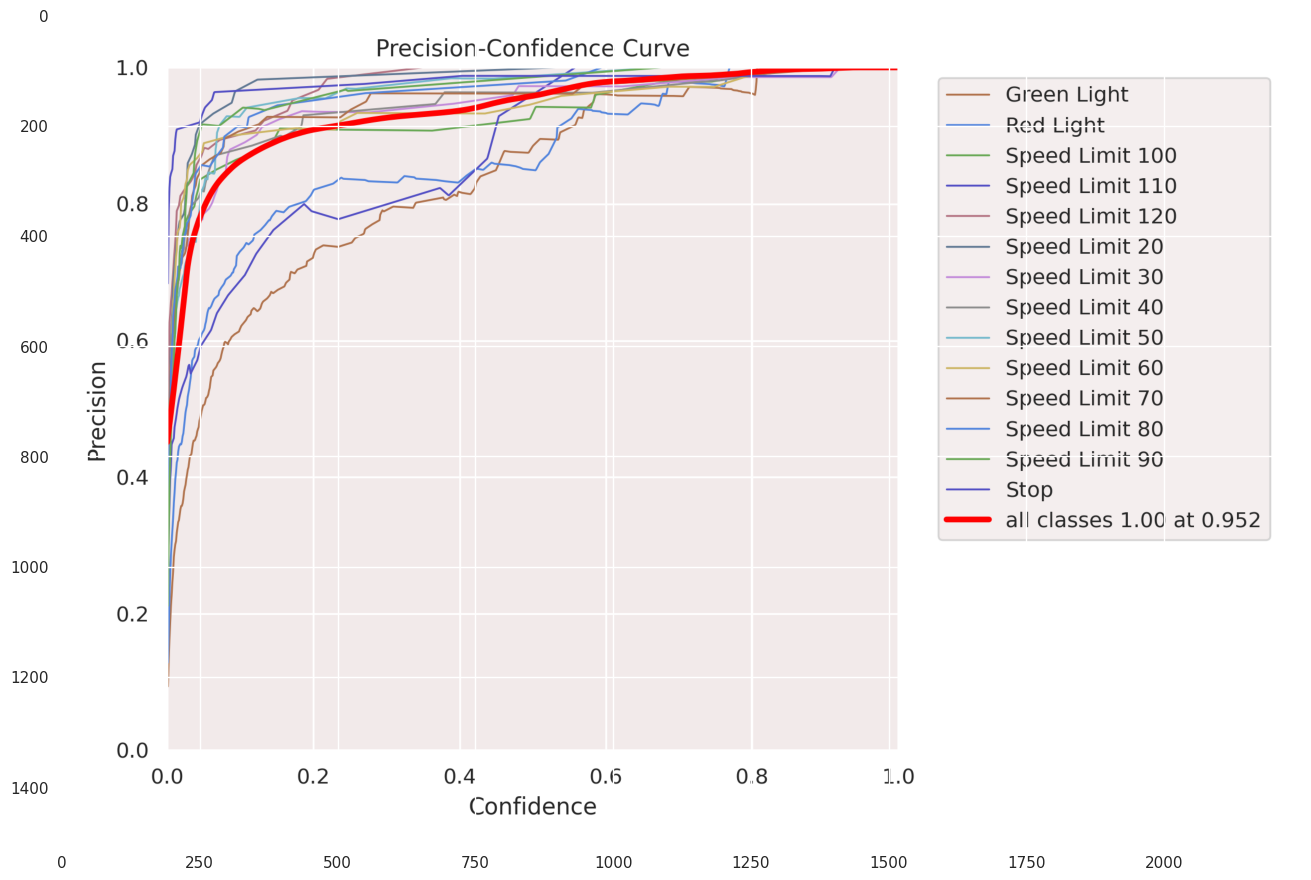

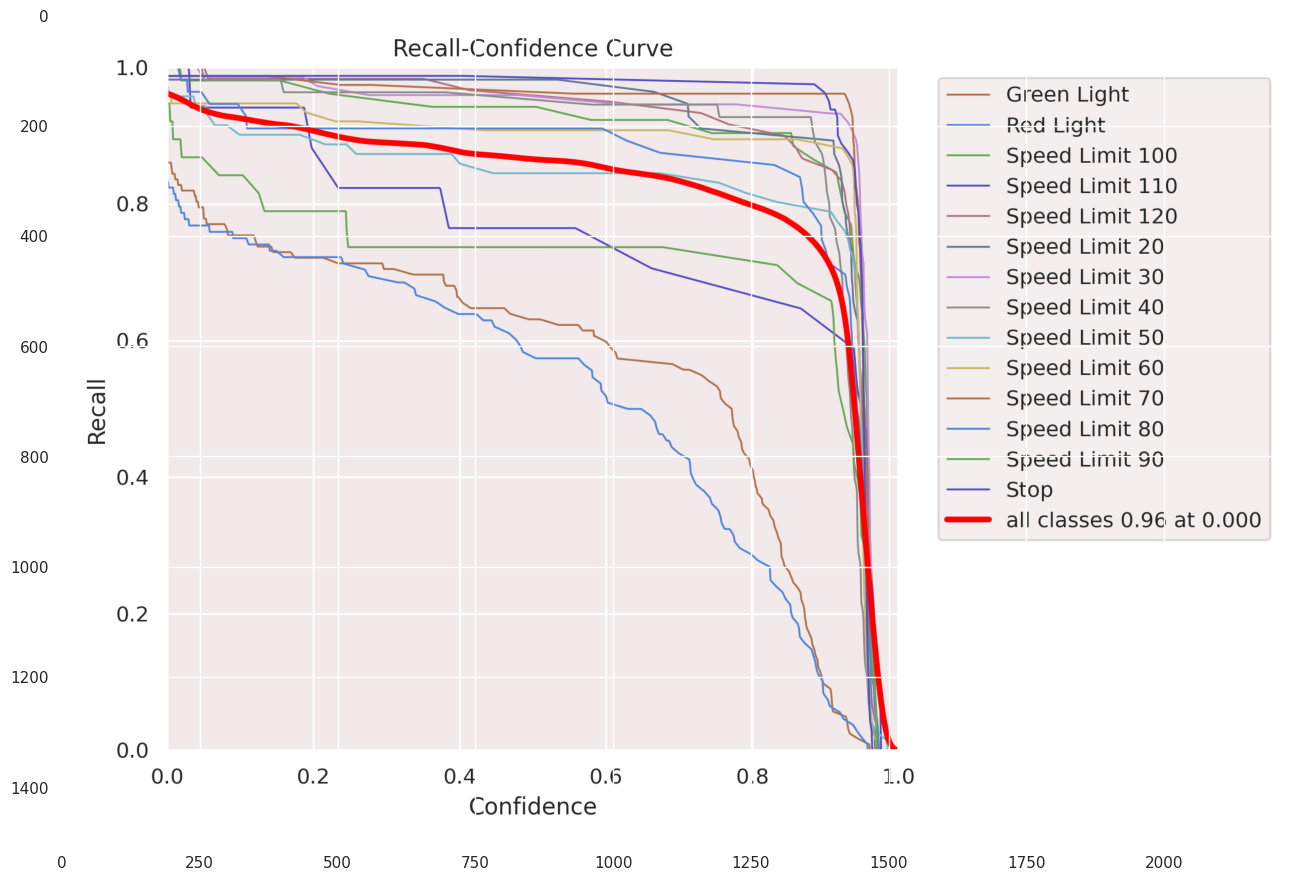

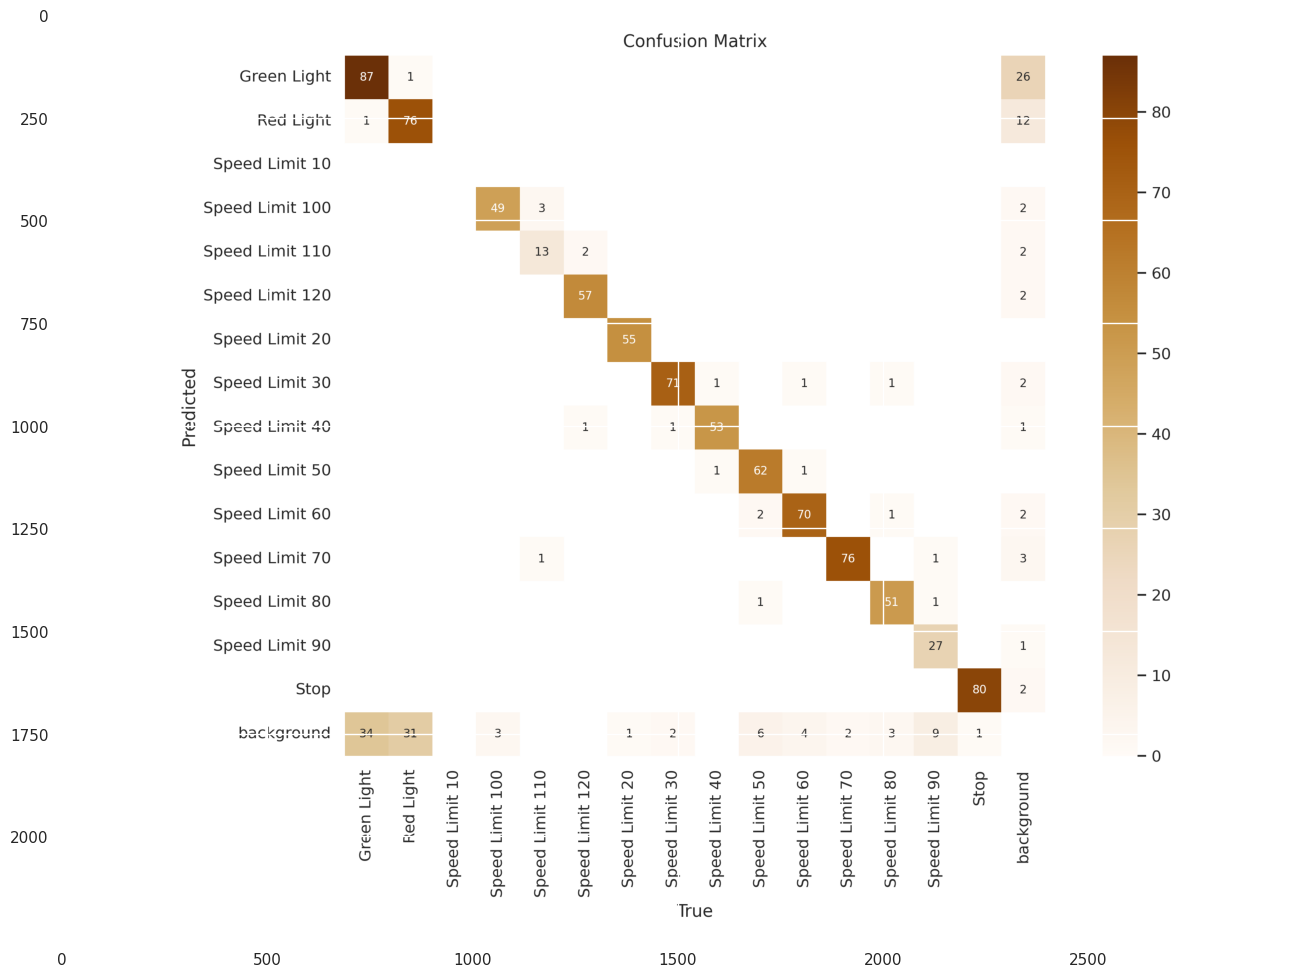

In [8]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [9]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
90                       91                  0.44466                  0.27932   
91                       92                  0.44021                  0.27198   
92                       93                  0.43647                  0.26622   
93                       94                  0.43450                  0.26359   
94                       95                  0.42937                  0.25920   
95                       96                  0.42899                  0.25799   
96                       97                  0.42996                  0.25912   
97                       98                  0.42924                  0.25485   
98                       99                  0.42352                  0.25433   
99                      100                  0.42230                  0.25368   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
90                  0.84383                  0.96286                  0.87703   
91                  0.84286                  0.93273                  0.88577   
92                  0.84468                  0.97101                  0.86576   
93                  0.84603                  0.96564                  0.86997   
94                  0.83788                  0.92937                  0.89054   
95                  0.84183                  0.96650                  0.85914   
96                  0.84264                  0.97177                  0.85667   
97                  0.84124                  0.97433                  0.85379   
98                  0.83868                  0.93378                  0.88450   
99                  0.84001                  0.96968                  0.86184   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
90                  0.94011                  0.82176                  0.51564   
91                  0.93978                  0.82268                  0.51810   
92                  0.93868                  0.81767                  0.51891   
93                  0.93806                  0.82019                  0.51844   
94                  0.93899                  0.82048                  0.51773   
95                  0.94097                  0.82131                  0.51556   
96                  0.93938                  0.82201                  0.51379   
97                  0.94108                  0.82198                  0.51318   
98                  0.94107                  0.82126                  0.51680   
99                  0.94287                  0.82486                  0.51627   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
90                  0.29342                  0.86561                 0.000057   
91                  0.30060                  0.86498                 0.000052   
92                  0.29938                  0.86589                 0.000047   
93                  0.30351                  0.86664                 0.000042   
94                  0.29506                  0.86584                 0.000037   
95                  0.29404                  0.86535                 0.000031   
96                  0.29187                  0.86525                 0.000026   
97                  0.29050                  0.86500                 0.000021   
98                  0.28803                  0.86620                 0.000016   
99                  0.28656                  0.86642                 0.000010   

                     lr/pg1                   lr/pg2  
90                 0.000057                 0.000057  
91                 0.000052                 0.000052  
92                 0.000047                 0.000047  
93                 0.000042                 0.000042  
94                 0.000037                 0.000037  
95                 0.000031                 0.000031  
96                 0.000026                 0.000026  
97            

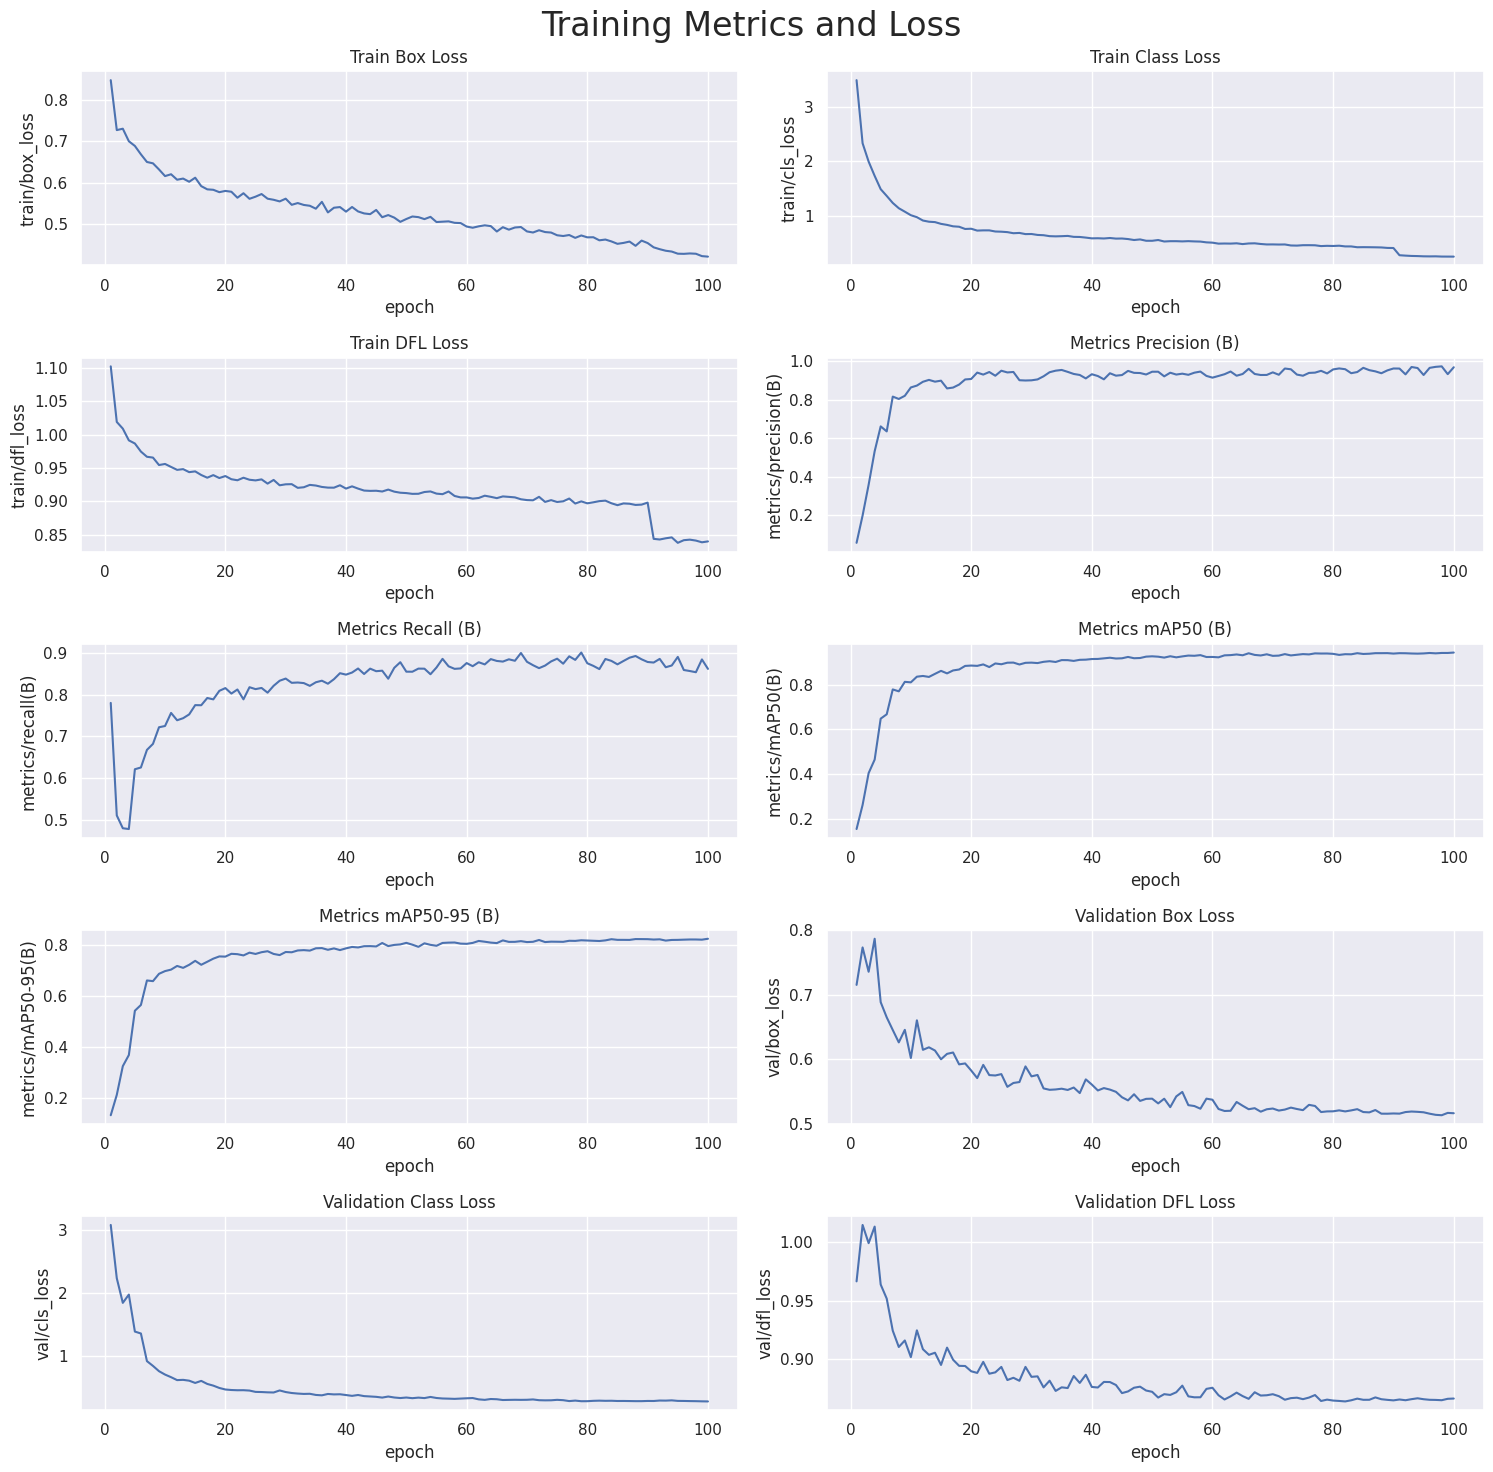

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')

# Strip the column names and assign them to Result_Final_model
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Replace df with Result_Final_model in the sns.lineplot calls
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [18]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Traffic/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [04:24<00:00,  2.42it/s]


val: New cache created: /content/drive/MyDrive/Traffic/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.16it/s]


                   all        638        770      0.958      0.868      0.939      0.808
           Green Light        638        110      0.964       0.72      0.881      0.518
             Red Light        638         94      0.918      0.598       0.71      0.434
        Speed Limit 10        638          3      0.949          1      0.995      0.796
       Speed Limit 100        638         46      0.937      0.913      0.986      0.883
       Speed Limit 110        638         21      0.967      0.714      0.874      0.772
       Speed Limit 120        638         44      0.944      0.977      0.985      0.899
        Speed Limit 20        638         46      0.986      0.957      0.979      0.895
        Speed Limit 30        638         60      0.945      0.862      0.955      0.888
        Speed Limit 40        638         53      0.977      0.962       0.98      0.879
        Speed Limit 50        638         50      0.953      0.818      0.929       0.84
        Speed Limit 6

In [19]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.957878733879869
metrics/recall(B):  0.868321813681166
metrics/mAP50(B):  0.9388211581329436
metrics/mAP50-95(B):  0.8076392967221473


In [20]:
# Path to the directory containing the images
image_dir = '/content/drive/MyDrive/Traffic/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Speed Limit 20, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 (no detections), 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Speed Limit 100, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Speed Limit 50, 10.5ms
Speed: 1.3ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Green Light, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Speed Limit 30, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detec

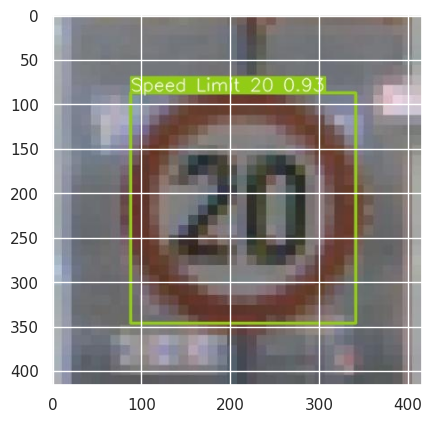

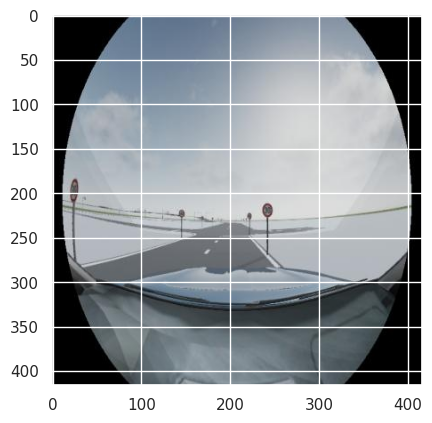

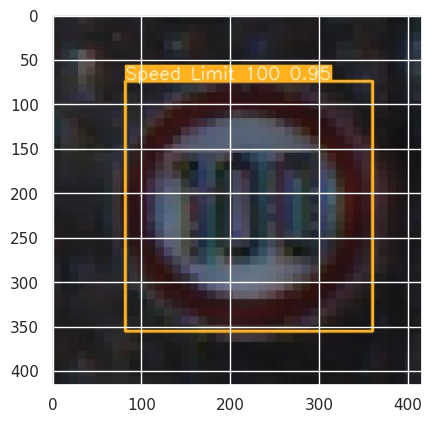

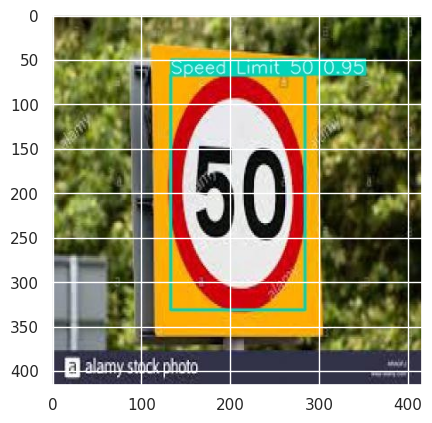

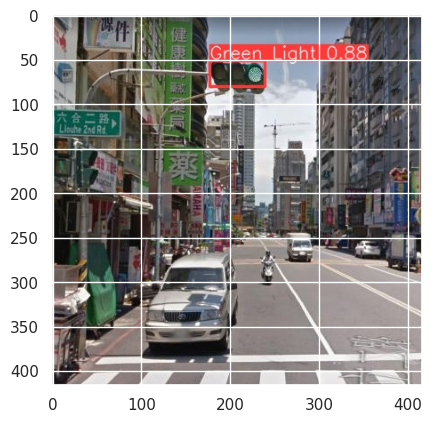

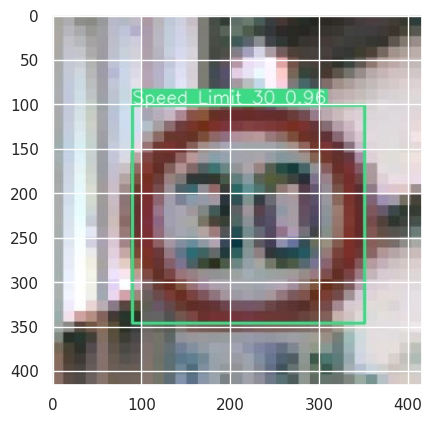

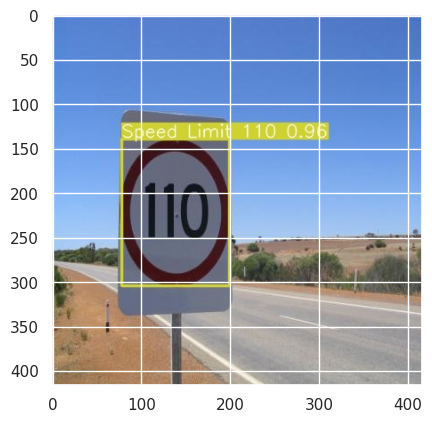

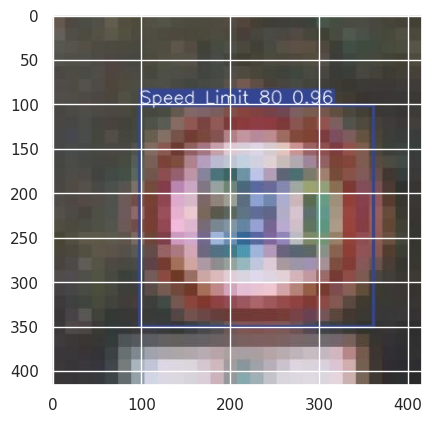

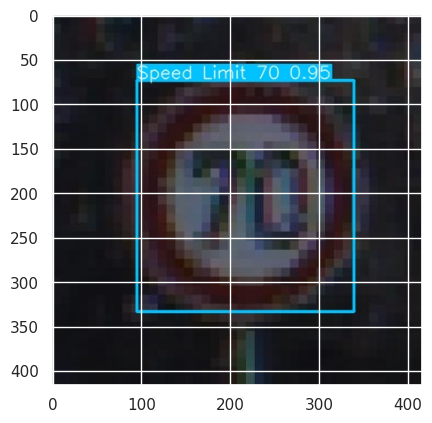

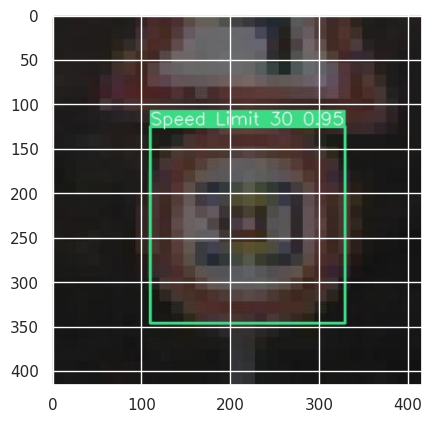

In [21]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()

In [23]:
# Assuming the YOLO model is stored in the variable 'model'
video_model = model

# Export the model
video_model.export(format='onnx')

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 79.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 11.7s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (14.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'